In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Defining parameters
dx = 0.01
dy = 0.01

U = 5
Vis = 0.00025
Imax = 41
Jmax = 41
J1 = 20
J2 = 25
J3 = 5
J4 = 10
F = 1.2
Eps = 0.0001
Nmax = 1000

In [3]:
# Pre - Allocating memory

u = np.zeros((Imax,Jmax))
v = np.zeros((Imax,Jmax))
psi = np.zeros((Imax,Jmax))
w = np.zeros((Imax,Jmax))

In [4]:
#Bottom Bounday Condition
for j in range(J1-1):
    u[0,j] = 0
    v[0,j] = 0
    psi[0,j] = 0

for i in range(Imax):
    u[i,0] = 0
    v[i,0] = 0
    psi[i,0] = 0

for j in range(J3-1):
    u[-1,j] = 0
    v[-1,j] = 0
    psi[-1,j] = 0


In [5]:
# Inlet Boundary Condition
for j in range(J1-1, J2): #J1:J2
    u[0,j] = U
    v[0,j] = 0
    w[0,j] = 0
    psi[0,j] = U*(j - (J1 - 2))*dy

psi[0,J2] = U*(J2 - (J1-1))*dy

In [6]:
# Upper Boundary Condition
for j in range(J2, Jmax): #(J2+1):Jmax
    u[0,j] = 0
    v[0,j] = 0
    psi[0,j] = psi[0,J2]

for j in range(J4, Jmax): #(J4+1):Jmax
    u[-1,j] = 0
    v[-1,j] = 0
    psi[-1,j] = psi[0,J2]

for i in range(Imax):
    u[i, -1] = 0
    v[i, -1] = 0
    psi[i, -1] = psi[0,J2]


In [7]:
# Setting Initial Guess for interior grid points
for i in range(1, Imax-1): #2:(Imax -1)
    for j in range(1, Jmax-1): #2:(Jmax - 1)
        u[i,j] = U
        v[i,j] = 0
        w[i,j] = 0
        psi[i,j] = U*j*dy


In [8]:
for n in range(Nmax): #1:Nmax
    sum = 0
    for i in range(1, Imax-1): #2:Imax-1
        for j in range(1, Jmax-1): #2:Jmax -1
            psi_advanced = 0.25*(psi[i+1, j] + psi[i-1, j] + psi[i, j+1] + psi[i, j-1] + ((dx **2) *w[i, j]))
            diff = psi_advanced - psi[i, j]
            psi[i,j] = psi[i, j] + F*diff
            sum = sum + diff*diff
    points_calculated = (Imax-2)*(Jmax-2)
    mean_square_error = sum/points_calculated
    RMS = math.sqrt(mean_square_error)
    if (RMS < Eps):
        p = n
        break
    elif ( n == Nmax):
        print(Nmax)
    
    #Setting up Vorticity at Walls using initial guess
    for i in range(Imax): #1:Imax
        w[i, 0] = -2*(psi[i, 1] - psi[i, 0])/(dy*dy)
        w[i, -1] = -2*(psi[i, -2] - psi[i, -1])/(dy*dy)

    for j in range(Jmax):
        if ( j < J1-1):
            w[0, j] = -2*(psi[1, j] - psi[0, j])/(dx*dx)
        elif ( j > J2-1):
            w[0, j] = -2*(psi[1, j] - psi[0, j])/(dx*dx)
    
    for j in range(Jmax):
        if (j < J3-1):
            w[-1, j] = -2*(psi[-2, j] - psi[-1, j])/(dx*dx)
        elif ( j > J4-1):
            w[-1, j] = -2*(psi[-2, j] - psi[-1, j])/(dx*dx)

    # Outlet boundary conditions
    
    for j in range(J3-1, J4):
        u[-1,j] = u[-2,j]
        v[-1,j] = v[-2,j]
        w[-1, j] = w[-2,j]
        psi[-1, j] = 2*psi[-2, j] - psi[-3, j]
        
    # Caculation of velocity

    for i in range(1, Imax-1):
        for j in range(1, Jmax-2):
            u[i,j] = (psi[i,j+1] - psi[i,j-1])/(2*dy)
            v[i,j] = (psi[i-1,j] - psi[i+1,j])/(2*dx)
            
    # Calculation of vorticity
    for i in range(1, Imax-1):
        for j in range(1, Jmax-2):
            if ( u[i,j] >= 0 and v[i,j] >= 0):
                w[i, j]=w[i+1,j]
                w[i, j]=w[i, j] + (1 + ((u[i,j]*dx)/Vis))*w[i-1,j]
                w[i, j]=w[i, j] + w[i,j+1]
                w[i, j]=w[i, j] + (1 + ((v[i,j]*dx)/Vis))*w[i,j-1]
                w[i, j]=w[i, j]/(((u[i,j]*dx)/Vis) + ((v[i,j]*dx)/Vis) +4 )
            elif( u[i,j] <= 0 and v[i,j] >= 0):
                w[i, j]=w[i-1,j]
                w[i, j]=w[i, j] + (1 - ((u[i,j]*dx)/Vis))*w[i+1,j]
                w[i, j]=w[i, j] + w[i,j+1]
                w[i, j]=w[i, j] + (1 + ((v[i,j]*dx)/Vis))*w[i,j-1]
                w[i, j]=w[i, j]/(-((u[i,j]*dx)/Vis) + ((v[i,j]*dx)/Vis) +4 )
            elif( u[i,j] <= 0 and v[i,j] <= 0):
                w[i, j]=w[i-1,j]
                w[i, j]=w[i, j] + (1 - ((u[i,j]*dx)/Vis))*w[i+1,j]
                w[i, j]=w[i, j] + w[i,j-1]
                w[i, j]=w[i, j] + (1 - ((v[i,j]*dx)/Vis))*w[i,j+1]
                w[i, j]=w[i, j]/(-((u[i,j]*dx)/Vis) - ((v[i,j]*dx)/Vis) +4 )
            elif ( u[i,j] >= 0 and v[i,j] <= 0):
                w[i, j]=w[i+1,j]
                w[i, j]=w[i, j] + (1 + ((u[i,j]*dx)/Vis))*w[i-1,j]
                w[i, j]=w[i, j] + w[i,j-1]
                w[i, j]=w[i, j] + (1 - ((v[i,j]*dx)/Vis))*w[i,j+1]
                w[i, j]=w[i, j]/(((u[i,j]*dx)/Vis) - ((v[i,j]*dx)/Vis) +4 )


In [9]:
u[:,-2] = 0
v_magn = np.zeros((Imax,Jmax))


for i in range(Imax):
    for j in range(Jmax):
        v_magn[i,j] = (u[i, j])**2 + (v[i, j])**2
        
        
x = np.linspace(0,1,41)  
y = np.linspace(0,1,41)       


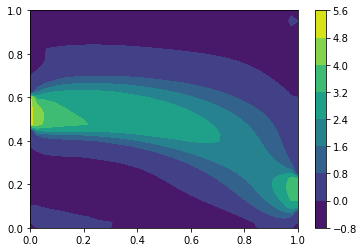

In [16]:
plt.contourf(x, y, np.transpose(u))
plt.colorbar()
plt.savefig("axial_velocity.pdf")


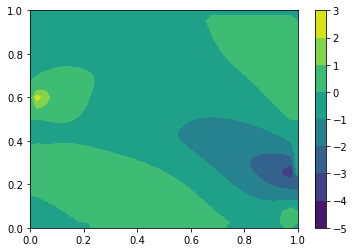

In [17]:
plt.contourf(x, y, np.transpose(v))
plt.colorbar()
plt.savefig("normal_velocity.pdf")

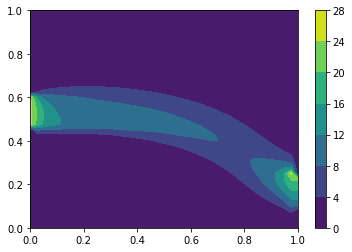

In [18]:
plt.contourf(x, y, np.transpose(v_magn))
plt.colorbar()
plt.savefig("velocity_magnitude.pdf")

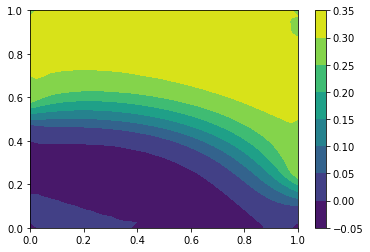

In [19]:
plt.contourf(x, y, np.transpose(psi))
plt.colorbar()
plt.savefig("psi.pdf")

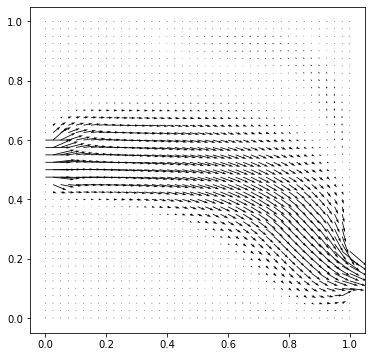

In [20]:
x, y = np.meshgrid(x, y)
plt.figure(figsize=(6,6))
plt.quiver(x, y, np.transpose(u), np.transpose(v))
plt.savefig("vel_vector.pdf")

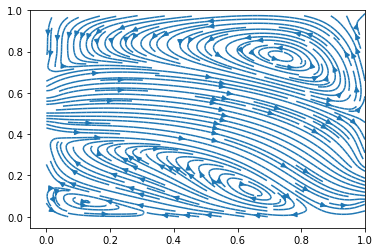

In [15]:
plt.streamplot(x, y, np.transpose(u), np.transpose(v), density=2)
plt.savefig("streamline.pdf")